<a href="https://colab.research.google.com/github/Ilyass-Dahaoui/Nonlinear-Objective-Function-Optimization-using-Genetic-Algorithm/blob/main/nonlinear_objective_function_optimization_using_genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 On pose A =t BB (avec B = rand(n, n)) une matrice définie positive f(x) = (txAx)/(
txx) avec x! = 0.
minimisons f :)

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [ ]:
def f(x,A):
  return np.dot(x.T, np.dot(A, x)) / np.dot(x.T, x)

In [ ]:
def create_population(n,Npop):
  return np.random.rand(Npop,n) #vecteurs x aleatoires de taille (Npop,n) avec n nombre de colonne

In [ ]:
create_population(5,5)

array([[0.30231418, 0.58155376, 0.39422165, 0.8574115 , 0.43589302],
       [0.39182102, 0.49614958, 0.91726546, 0.98064725, 0.54019345],
       [0.53832236, 0.05354388, 0.79127562, 0.92519327, 0.90500853],
       [0.80825719, 0.15258599, 0.1195773 , 0.81666175, 0.35124242],
       [0.26134446, 0.17931226, 0.39205678, 0.20924008, 0.23998217]])

In [ ]:
def evaluate_fitness(population,A):
  return [f(i,A) for i in population]

In [ ]:
A=np.array([[0.42444807, 0.14833028, 0.73475604, 0.24005475, 0.61133401],
       [0.78374958, 0.89268804, 0.05045449, 0.06762568, 0.31593925],
       [0.6454113 , 0.66190514, 0.54389799, 0.31264482, 0.65023304],
       [0.07325399, 0.83655693, 0.36650212, 0.33867058, 0.07119236],
       [0.85874057, 0.77863236, 0.42890383, 0.74911828, 0.86015862]])

In [ ]:
evaluate_fitness(create_population(5,5),A)

[2.2234150056461903,
 2.2547672257978064,
 1.2932425180232094,
 1.9647108121668182,
 1.524730747587434]

In [ ]:
def selection(population,fitness):
  best_indices=np.argsort(fitness)[:len(population)]
  best_population=population[best_indices]
  return best_population

In [ ]:
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child

In [ ]:
def mutation(individu,em):
    individu = individu + np.random.normal(0,em, size=len(individu))
    return individu

In [ ]:
def genetic_algorithm(A,Npop,em, precision):
    n = A.shape[0]
    population = create_population(n, Npop)
    fitness_values = evaluate_fitness(population, A)
    best_fitness = np.min(fitness_values)
    best_individual = population[np.argmin(fitness_values)]

    while True:
        selected_population = selection(population, fitness_values)
        new_population = []
        for i in range(0, Npop,2): #on prend les paires ou on prend chaque individu de 0,N-1
            parent1, parent2 = selected_population[i], selected_population[i+1]
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            child=random.choice([child1,child2])
            mutated_child=mutation(child,em)
            new_population.extend([mutated_child, child])

        population = np.array(new_population)
        fitness_values = evaluate_fitness(population, A)
        new_best_fitness = np.min(fitness_values)

        if np.abs(new_best_fitness - best_fitness) < precision:
            break

        best_fitness = new_best_fitness
        best_individual = population[np.argmin(fitness_values)]

    return best_individual, best_fitness


In [ ]:

n = 5
B= np.random.rand(n, n)
A = np.dot(B.T, B)
Npop = 50
precision = 1e-6
em=1

best_individual, best_fitness = genetic_algorithm(A, Npop,em, precision)
print("Meilleur individu trouvé:", best_individual)
print("Meilleure fitness:", best_fitness)

Meilleur individu trouvé: [-14.50795996 -11.52662264  -0.77089907  51.92573476  -4.76679172]
Meilleure fitness: 0.19765036677727943


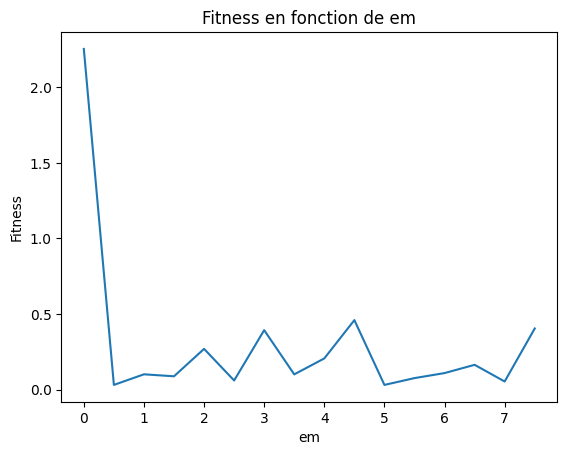

In [ ]:
n = 5
B= np.random.rand(n, n)
A = np.dot(B.T, B)
Npop = 50
precision = 1e-6
result=[]
em_values=[i for i in np.arange(0,8,0.5)]
for em in em_values:
  best_individual, best_fitness = genetic_algorithm(A, Npop,em, precision)
  result.append(best_fitness)

plt.plot(em_values,result)
plt.xlabel('em')
plt.ylabel('Fitness')
plt.title('Fitness en fonction de em')
plt.show()



